In [35]:
import sys
sys.path.append('/home/data/lwfaserver/')

from NicePlots import format_axes, latexify

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib notebook

%load_ext autoreload
%autoreload 2

latexify(columns = 1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
from Magnets import Halbachring, Stick, B, PlotModel

In [37]:
phalbach_ideal_di = [Stick(0.18,2 * np.exp(2j*phi),np.exp(1j*phi)) for phi in np.linspace(0,np.pi*2,17)[:-1]]
phalbach_ideal_quad = [Stick(0.18,2 *np.exp(3j*phi),np.exp(1j*phi)) for phi in np.linspace(0,np.pi*2,17)[:-1]]

<IPython.core.display.Javascript object>


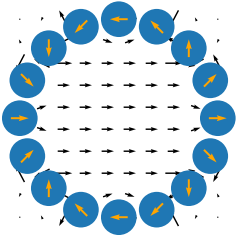

<IPython.core.display.Javascript object>


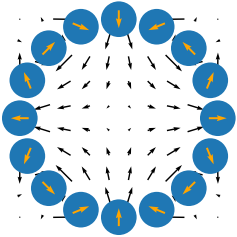

In [56]:
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

latexify(fig_width = 3, fig_height = 3)

plt.figure('ha1')
ax1 = plt.gca()
plt.axis('off')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
PlotModel(phalbach_ideal_di, ax = ax1)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('Magnetarrays_dp.pdf')

plt.figure('ha2')
ax2 = plt.gca()
plt.axis('off')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')

PlotModel(phalbach_ideal_quad, ax = ax2)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('Magnetarrays_qp.pdf')

In [21]:
h1 = Halbachring(1, 1.3, 0.2, m = 2, phi = 0)



In [22]:
def angle(xy, radius, theta1, theta2, label = None, ax = None, dr = 0.01, fontsize = 18):
    import matplotlib.patches as mpatches
    if ax == None:
        ax = plt.gca()
    if label:
        r = radius
        plt.text(xy[0] + (r/2 + dr)* np.cos((theta2 + theta1)/2),xy[1]+ (r/2 + dr)* np.sin((theta2 + theta1)/2), label, fontsize = fontsize)
    
    cir = mpatches.Arc(xy, radius *2, radius *2, angle=0.0, theta1=theta1 *  180 / np.pi, theta2=theta2 * 180 / np.pi)
    
    ax.add_patch(cir)

In [23]:
from numpy import radians as rad
def drawCirc(radius,centX,centY,angle_,theta2_,color_='black',ax = None):
    import matplotlib.patches as mpatches
    #========Line
    if ax == None:
        ax = plt.gca()
    
    arc = mpatches.Arc([centX,centY],radius,radius,angle=angle_,
          theta1=0,theta2=theta2_,capstyle='round',linestyle='-',lw=2,color=color_)
    ax.add_patch(arc)


    #========Create the arrow head
    endX=centX+(radius/2)*np.cos(rad(theta2_+angle_)) #Do trig to determine end position
    endY=centY+(radius/2)*np.sin(rad(theta2_+angle_))

    ax.add_patch(                    #Create triangle as arrow head
        mpatches.RegularPolygon(
            (endX, endY),            # (x,y)
            3,                       # number of vertices
            radius/9,                # radius
            rad(angle_+theta2_),     # orientation
            color=color_
        )
    )

<IPython.core.display.Javascript object>


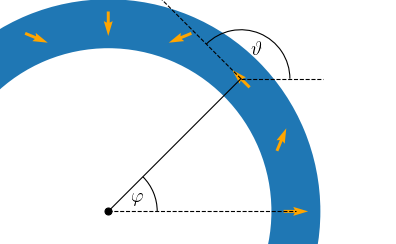

[  2.00000000e-01 +0.00000000e+00j   7.65366865e-02 +1.84775907e-01j
  -1.41421356e-01 +1.41421356e-01j  -1.84775907e-01 -7.65366865e-02j
  -3.67394040e-17 -2.00000000e-01j   1.84775907e-01 -7.65366865e-02j
   1.41421356e-01 +1.41421356e-01j  -7.65366865e-02 +1.84775907e-01j
  -2.00000000e-01 +7.34788079e-17j  -7.65366865e-02 -1.84775907e-01j
   1.41421356e-01 -1.41421356e-01j   1.84775907e-01 +7.65366865e-02j
   1.40896280e-16 +2.00000000e-01j  -1.84775907e-01 +7.65366865e-02j
  -1.41421356e-01 -1.41421356e-01j   7.65366865e-02 -1.84775907e-01j]


In [57]:
latexify(columns = 2)

plt.figure()
h1.plot()
plt.xlim((-0.2,1.3))
plt.ylim((-0.2,1.3))
plt.plot((0,1.15/np.sqrt(2)),(0,1.15/np.sqrt(2)), 'black')
plt.plot((0,1.15),(0,0),'--', color = 'black')
plt.plot(1.15/np.sqrt(2) * np.array((1,0)),1.15/np.sqrt(2) * np.array((1,2)),'--', color = 'black')
plt.plot((1.15/np.sqrt(2),1.15/np.sqrt(2) + 0.5),(1.15/np.sqrt(2),1.15/np.sqrt(2)),'--', color = 'black')
plt.scatter((0),(0),  s = 40, color = 'black', edgecolor = None)


angle((0,0), 0.3,  0, np.pi/4, label = r'$\varphi$', dr = 0)

angle(np.array((1.15,1.15))/np.sqrt(2), 0.3,0, np.pi*3/4, label = r'$\vartheta$', dr = 0.01)

plt.axis('off')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('angle_def.pdf')

<IPython.core.display.Javascript object>


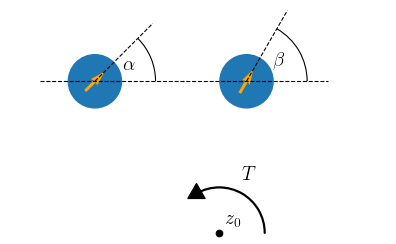

In [58]:


plt.figure()
d = 1
R = 0.18
phi1 = np.pi/4
phi2 = np.pi/3
sticks = [Stick(R,1 * np.exp(1j * phi1), -d), Stick(R,1 * np.exp(1j * phi2), 0)]

[stick.plot() for stick in sticks]

plt.plot((-d -2*R, 3*R ),(0,0), '--', color = 'black')

plt.plot((0, 3*R*np.cos(phi2) ),(0,3*R*np.sin(phi2)), '--', color = 'black')
angle((0,0), 0.4,  0, phi2, label = r'$\beta$', dr = 0)

plt.plot((-d, -d + 3*R*np.cos(phi1) ),(0,3*R*np.sin(phi1)), '--', color = 'black')
angle((-d,0), 0.4,  0, phi1, label = r'$\alpha$', dr = 0)

plt.axis('off')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
plt.tight_layout()




plt.plot((-R),(-d),'o', color = 'black')
plt.text(-R+R/5,-d+R/5, r'$z_0$',fontsize = 18)
plt.xlim(-d - 2*R, 4*R)

drawCirc(0.6, -R,-d, 0,120)
plt.text(-R+0.15,-d+0.35, r'$T$',fontsize = 18)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.savefig('torque.pdf')